# Crab Regression With XGBoost


## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Loading Data

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


## Finding outliers in the data

<Axes: >

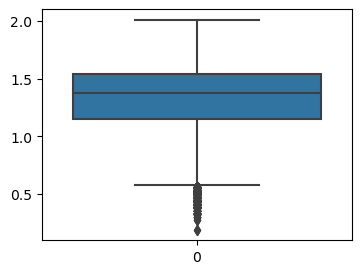

In [3]:
# Thanks to https://www.kaggle.com/code/anjusukumaran4/crab-age-dataset-eda-prediction-4-models#Model-Building for this analysis
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Length'])

<Axes: >

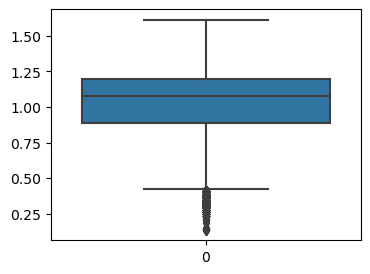

In [4]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Diameter'])

<Axes: >

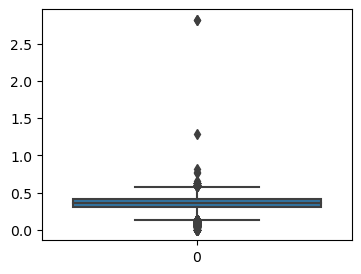

In [5]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Height'])

<Axes: >

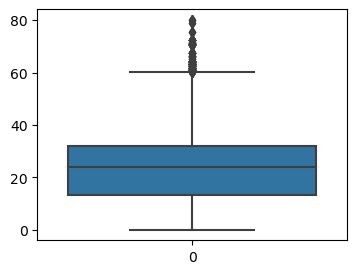

In [6]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Weight'])


<Axes: >

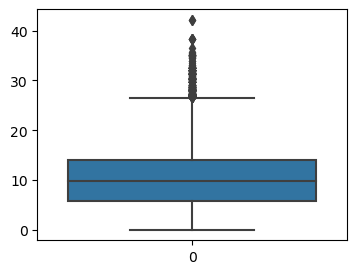

In [7]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Shucked Weight'])

<Axes: >

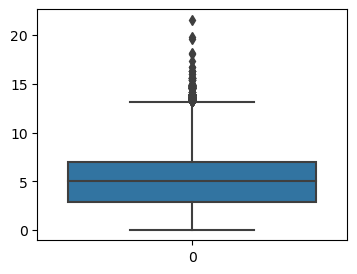

In [8]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Viscera Weight'])

<Axes: >

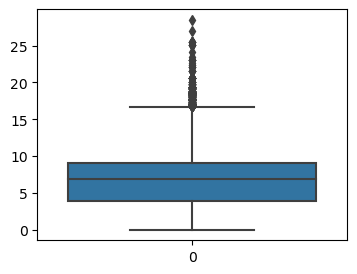

In [9]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Shell Weight'])


In [10]:
df_train=df_train.drop(df_train[df_train['Length']<0.35].index)
df_train=df_train.drop(df_train[df_train['Diameter']<0.2].index)
df_train=df_train.drop(df_train[df_train['Height']>1.2].index)
df_train=df_train.drop(df_train[df_train['Weight']>70].index)
df_train=df_train.drop(df_train[df_train['Shucked Weight']>40].index)
df_train=df_train.drop(df_train[df_train['Viscera Weight']>18].index)
df_train=df_train.drop(df_train[df_train['Shell Weight']>25].index)


In [11]:
df_train.shape

(73948, 10)

## Preprocessing

In [12]:
df_train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [13]:
X_train = df_train.drop(columns='Age')
y_train = df_train['Age']

In [14]:
X_train['Sex']=X_train['Sex'].map({'M':0,'F':1,'I':2})


In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


## Model Building

In [17]:
from xgboost import XGBRegressor



In [18]:
model=XGBRegressor(n_estimators=1000,learning_rate=0.01,random_state=0,max_depth=7,gamma=0.65,min_child_weight=40,tree_method='hist',subsample=0.7)
model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.65, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## Submission

In [19]:
df_test['Sex']=df_test['Sex'].map({'M':0,'F':1,'I':2})


In [20]:
prediction=model.predict(df_test).round()


In [21]:
submission=pd.DataFrame({'id':df_test.id,'Age':prediction})
submission.to_csv('submission.csv',index=False)

In [22]:
submission

,id,Age
0,74051,13.0
1,74052,12.0
2,74053,12.0
3,74054,12.0
4,74055,12.0
...,...,...
49363,123414,12.0
49364,123415,12.0
49365,123416,12.0
49366,123417,12.0
